In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
######################################################################## UTILITY FUNCTIONS ######################################################################################

In [ ]:
''' converts from '.csv' file to a numpy array '''
def extractData(s):
  data_df = pd.read_csv(s)
  return data_df.to_numpy()

In [ ]:
''' seperates the first column of a np array as index / serial numbers'''
def seperateIndex(data):
  return data[:,1:]

In [ ]:
''' seperates the last column of a np array as label, and the rest as features'''
def seperateFeatures(data):
  X = data[:,:-1]
  y = data[:,-1]
  y.shape = (y.size,1)
  return (X,y)

In [ ]:
''' returns np array with values scaled data by the formula : (x-mean)/(standard deviation) '''
def meanScaling(data):
  return ((data - np.mean(data, axis=0))/np.std(data, axis=0))

In [ ]:
'''returns np array with values descaled w.r.t original data'''
def deMeanScaling(data_scaled, original_data):
  return ((data_scaled*np.std(original_data, axis=0))+np.mean(original_data, axis=0))

In [ ]:
''' return matrix with an added bias row (of all ones) as the first row of the given matrix '''
def addBias(X):
  m = X.shape[0]
  u = np.ones((m,1))
  X = np.append(u, X, axis = 1)
  return X

In [ ]:
#################################################################################################################################################################################

In [ ]:
'''returns mse between two vectors (hypothesis and target vector)'''
def loss(hypothesis, y):
  m = y.size
  return (1/(2*m))*(np.sum((hypothesis - y)**2))

In [ ]:
'''returns the gradient of the loss function'''
def gradient(X, hypothesis, y):
  m = y.size
  return (1/m)*(X.T@(hypothesis-y))

In [ ]:
'''Training'''
def train(X_train, y_train, num_iter, alpha):

  '''
  X-train  --> Design matrix of features of trainig data
  y_train  --> Target value vector of trainig data
  num_iter --> number of iterations
  alpha    --> learning rate
  '''
  
  m,n = X_train.shape
  # m --> number of trainig examples
  # n --> number of features

  # initialising losses
  losses=[]

  #scaling X and adding bias
  X_train = meanScaling(X_train)
  X_train = addBias(X_train)

  #initializing theta
  theta = np.zeros((n+1,1))

  #reshaping and scaling y
  y_train.shape = (m,1)
  y_train = meanScaling(y_train)

  #trainig loop
  for i in range(num_iter):

    hypothesis = X_train@theta

    #calculation and appending loss
    losses.append(loss(hypothesis,y_train))

    #calculating gradient
    grad = gradient(X_train, hypothesis, y_train)

    #updating theta
    theta -= alpha*grad
  
  #plotting loss
  plt.plot(losses)
  for i in range(-1, -6, -1):
    print(losses[i])

  return theta

In [ ]:
def predict( X_test, y_test, y_train, theta):
  '''
  X_test  --> Design matrix of features of testing data
  y_test  --> Target value vector of testing data
  y_train --> Target value vector of trainig data (for descaling)
  theta   --> parameter obtained after training
  '''
  
  X_test = meanScaling(X_test)
  X_test = addBias(X_test)

  hypothesis = deMeanScaling(X_test@theta, y_train)
  print('Loss = ', loss(hypothesis, y_test))
  
  return hypothesis

In [ ]:
data_train = extractData('/content/drive/MyDrive/WOC/Datasets/Linear_train.csv')
data_train = seperateIndex(data_train)
X_train,y_train = seperateFeatures(data_train)

In [ ]:
data_test = extractData('/content/drive/MyDrive/WOC/Datasets/Linear_test.csv')
data_test = seperateIndex(data_test)
X_test,y_test = seperateFeatures(data_test)

7.805373437795185e-05
7.805373437795185e-05
7.805373437795185e-05
7.805373437795183e-05
7.805373437795186e-05


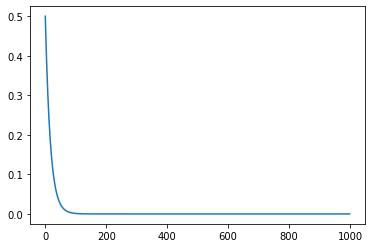

In [ ]:
theta = train(X_train, y_train, 1000, 0.03)

In [ ]:
hypothesis = predict(X_test, y_test, y_train, theta)

Loss =  2794.586689591185


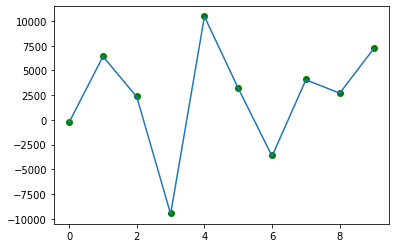

In [ ]:
plt.scatter(range(10), y_test[:10], c='g')
plt.plot(range(10), hypothesis[:10])